In [1]:
import os
import re
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/drive/MyDrive/Dataset.txt"

# Check if the data has already been loaded
if 'content' in locals() or 'content' in globals():
    print("Data is already loaded.")
else:
    # Load the data from the file
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            text = file.readlines()
    else:
        print("File does not exist.")


In [4]:
lines = [line.strip() for line in text]

In [5]:
print(len(lines))

24638


In [6]:
print(text[:50])

['Hi.\tمرحبًا.\n', 'Run!\tاركض!\n', 'Help!\tالنجدة!\n', 'Jump!\tاقفز!\n', 'Stop!\tقف!\n', 'Go on.\tداوم.\n', 'Go on.\tاستمر.\n', 'Hello!\tمرحباً.\n', 'Hurry!\tتعجّل!\n', 'Hurry!\tاستعجل!\n', 'I see.\tانا اري\n', 'I won!\tأنا فُزت!\n', 'Relax.\tاسترح.\n', 'Smile.\tابتسم.\n', 'Cheers!\tفي صحتك.\n', 'Got it?\tهل فهمت؟\n', 'He ran.\tركض.\n', 'I know.\tأعرف.\n', 'I know.\tأعلم ذلك.\n', 'I know.\tأنا أعلم\n', "I'm 19.\tأنا في 19\n", "I'm OK.\tأنا بخير.\n", 'Listen.\tاستمع\n', 'No way!\tغير معقول!\n', 'Really?\tحقاً؟\n', 'Thanks.\tشكرا.\n', 'Why me?\tلماذا أنا؟\n', 'Awesome!\tرائع!\n', 'Be cool.\tخذ راحتك.\n', 'Call me.\tهاتفني.\n', 'Call me.\tاتصل بي.\n', 'Come in.\tتفضل بالدخول.\n', 'Come in.\tتعال إلى الداخل\n', 'Come on!\tبالله عليك!\n', 'Come on!\tهيا\n', 'Come on!\tهيّا\n', 'Get out!\tاخرج من هنا!\n', 'Get out!\tأُخرج!\n', 'Get out.\tاخرج!\n', 'Go away.\tاتركني و شأني.\n', 'Go away.\tاذهب بعيداً.\n', 'Go away.\tارحل.\n', 'Goodbye!\tمع السلامة.\n', 'He came.\tلقد أتى.\n', 'He runs.\tهو ي

In [7]:
with open(file_path, 'r') as f:
    string = f.read()

with open('eng_arab.txt','w') as f:
    f.write(string)

In [8]:
data = pd.read_csv('eng_arab.txt',sep="\t",header=None)
data.columns=['English', "Arabic"]
data['English'] = data['English'].str.replace('<', '')
data['English'] = data['English'].str.replace('>', '')
data['Arabic'] = data['Arabic'].str.replace('>', '')
data['Arabic'] = data['Arabic'].str.replace('<', '')
data['English'] = "< "+data['English']+" >"
data['Arabic'] = "< "+data['Arabic']+" >"

In [9]:
#check if there is english in the arabic data
arabic_sentences=data['Arabic']
for sentence in arabic_sentences:
    # Use a regular expression to find English words in the sentence
    english_words = re.findall(r'\b[a-zA-Z]+\b', sentence)

    if english_words:
        print(f"English words found in sentence: '{sentence}'")
        print(english_words)
    else:
        continue

English words found in sentence: '< أنا أستخدم Firefox >'
['Firefox']
English words found in sentence: '< eng I stayed there for three days. >'
['eng', 'I', 'stayed', 'there', 'for', 'three', 'days']
English words found in sentence: '< لماذا يسمى الخريف "fall" في أمريكا؟ >'
['fall']
English words found in sentence: '< Tatoeba معناها "على سبيل المثال" باللغة اليابانية. >'
['Tatoeba']
English words found in sentence: '< ما الذي تعنيه كلمة "get" في هذه الجملة؟ >'
['get']
English words found in sentence: '< كونها كلمة مؤلفة من ٢٥ حرفاً، anticonstitutionnellement -أي "مخالف للدستور"- هي أطول كلمة في اللغة الفرنسية. >'
['anticonstitutionnellement']


In [10]:
#finding if there is tashkeel in the arabic data
arabic_data = data['Arabic']
# Regular expression pattern to match tashkeel in Arabic text
tashkeel_pattern = r'[\u064B-\u0652]+'  # Range of tashkeel unicode characters

def has_tashkeel(text):
    return bool(re.search(tashkeel_pattern, text))

# Iterate over the NumPy array and check for tashkeel
for text in arabic_data:
    if has_tashkeel(text):
        print(f'Tashkeel found in: "{text}"')
    else:
        continue


Tashkeel found in: "< مرحبًا. >"
Tashkeel found in: "< مرحباً. >"
Tashkeel found in: "< تعجّل! >"
Tashkeel found in: "< أنا فُزت! >"
Tashkeel found in: "< حقاً؟ >"
Tashkeel found in: "< هيّا >"
Tashkeel found in: "< أُخرج! >"
Tashkeel found in: "< اذهب بعيداً. >"
Tashkeel found in: "< أنا أيضاً. >"
Tashkeel found in: "< أهلاً و سهلاً! >"
Tashkeel found in: "< مرحباً بك! >"
Tashkeel found in: "< فهمتُهُ. >"
Tashkeel found in: "< فهمتُها. >"
Tashkeel found in: "< فَهمتُ ذلك. >"
Tashkeel found in: "< أنا حُرّ. >"
Tashkeel found in: "< اِنتبه! >"
Tashkeel found in: "< لقد كذِبَ توم. >"
Tashkeel found in: "< لقد خَسِرَ توم. >"
Tashkeel found in: "< يُباركك. >"
Tashkeel found in: "< اِهدأ. >"
Tashkeel found in: "< هل أنا فُزت؟ >"
Tashkeel found in: "< عفواً. >"
Tashkeel found in: "< انسَ الأمر. >"
Tashkeel found in: "< انسَ ذلك >"
Tashkeel found in: "< انسَ الأمر. >"
Tashkeel found in: "< انسَ ذلك >"
Tashkeel found in: "< أُدخُلْ. >"
Tashkeel found in: "< أنا رجلٌ. >"
Tashkeel found in: "< ل

In [11]:
# to remove the english and tashkeel from the arabic data

# Regular expression pattern to match English and tashkeel in Arabic text
english_pattern = r'[a-zA-Z0-9]+'
tashkeel_pattern = r'[\u064B-\u0652]+'

# Function to remove English and tashkeel from a sentence
def remove_english_and_tashkeel(text):
    text = re.sub(english_pattern, '', text)  # Remove English and digits
    text = re.sub(tashkeel_pattern, '', text)  # Remove Tashkeel
    return text


for i in range(len(data['Arabic'])):
    arabic_sentence = data['Arabic'][i]
    cleaned_arabic = remove_english_and_tashkeel(arabic_sentence)
    data['Arabic'][i] = cleaned_arabic

In [12]:
data['Arabic'][0]

'< مرحبا. >'

In [13]:
#finding if there is tashkeel in the arabic data
arabic_data = data['Arabic']
# Regular expression pattern to match tashkeel in Arabic text
tashkeel_pattern = r'[\u064B-\u0652]+'  # Range of tashkeel unicode characters

def has_tashkeel(text):
    return bool(re.search(tashkeel_pattern, text))

# Iterate over the NumPy array and check for tashkeel
for text in arabic_data:
    if has_tashkeel(text):
        print(f'Tashkeel found in: "{text}"')
    else:
        continue


In [14]:
#check if there is english in the arabic data
arabic_sentences=data['Arabic']
for sentence in arabic_sentences:
    # Use a regular expression to find English words in the sentence
    english_words = re.findall(r'\b[a-zA-Z]+\b', sentence)

    if english_words:
        print(f"English words found in sentence: '{sentence}'")
        print(english_words)
    else:
        continue

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24638 entries, 0 to 24637
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   English  24638 non-null  object
 1   Arabic   24638 non-null  object
dtypes: object(2)
memory usage: 385.1+ KB


In [16]:
data.head()

,English,Arabic
0,< Hi. >,< مرحبا. >
1,< Run! >,< اركض! >
2,< Help! >,< النجدة! >
3,< Jump! >,< اقفز! >
4,< Stop! >,< قف! >


In [17]:
data.tail()

,English,Arabic
24633,< rising voices promoting a more linguisticall...,< شاركنا تحدي ابداع ميم بلغتك الام تعزيزا للتن...
24634,< following last year s successful campaign we...,< استكمالا لنجاح حملة العام السابق ندعوكم للمش...
24635,< during last year s challenge we also met lan...,< تعرفنا خلال تحدي العام الماضي على ابطال لغوي...
24636,< to take part just follow the simple steps ou...,< للمشاركة في التحدي اتبع الخطوات الموضحة على ...
24637,< you will also find links to some free web ba...,< ستجد ايضا روابط لمجموعة من منصات ابداع الميم...


In [18]:
num_samples = 10_000

data = data.head(num_samples)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   English  10000 non-null  object
 1   Arabic   10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [20]:
input_texts = data['English'].to_list()
output_texts = data['Arabic'].to_list()

In [21]:
input_characters = set()

for sentence in input_texts:
  for char in sentence:
    input_characters.add(char)

In [22]:
output_characters = set()

for sentence in output_texts:
  for char in sentence:
    output_characters.add(char)

In [23]:
# unique source lang (english) characters, unique target lang (arabic) characters
len(input_characters), len(output_characters)

(75, 68)

In [24]:
input_characters = sorted(list(input_characters))
output_characters = sorted(list(output_characters))

num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(output_characters)

max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in output_texts])

num_encoder_tokens, num_decoder_tokens, max_encoder_seq_length, max_decoder_seq_length

(75, 68, 48, 69)

In [25]:
input_token_index = dict([(char, i) for i, char in enumerate(input_characters)])
output_token_index = dict([(char, i) for i, char in enumerate(output_characters)])

In [26]:
input_token_index

{' ': 0,
 '!': 1,
 '"': 2,
 "'": 3,
 ',': 4,
 '-': 5,
 '.': 6,
 '0': 7,
 '1': 8,
 '2': 9,
 '3': 10,
 '4': 11,
 '5': 12,
 '6': 13,
 '7': 14,
 '8': 15,
 '9': 16,
 ':': 17,
 '<': 18,
 '>': 19,
 '?': 20,
 'A': 21,
 'B': 22,
 'C': 23,
 'D': 24,
 'E': 25,
 'F': 26,
 'G': 27,
 'H': 28,
 'I': 29,
 'J': 30,
 'K': 31,
 'L': 32,
 'M': 33,
 'N': 34,
 'O': 35,
 'P': 36,
 'Q': 37,
 'R': 38,
 'S': 39,
 'T': 40,
 'U': 41,
 'V': 42,
 'W': 43,
 'X': 44,
 'Y': 45,
 'Z': 46,
 'a': 47,
 'b': 48,
 'c': 49,
 'd': 50,
 'e': 51,
 'f': 52,
 'g': 53,
 'h': 54,
 'i': 55,
 'j': 56,
 'k': 57,
 'l': 58,
 'm': 59,
 'n': 60,
 'o': 61,
 'p': 62,
 'q': 63,
 'r': 64,
 's': 65,
 't': 66,
 'u': 67,
 'v': 68,
 'w': 69,
 'x': 70,
 'y': 71,
 'z': 72,
 '’': 73,
 '€': 74}

In [27]:
output_token_index

{' ': 0,
 '!': 1,
 '"': 2,
 '(': 3,
 ')': 4,
 ',': 5,
 '-': 6,
 '.': 7,
 '/': 8,
 ':': 9,
 '<': 10,
 '>': 11,
 '?': 12,
 '\\': 13,
 '،': 14,
 '؟': 15,
 'ء': 16,
 'آ': 17,
 'أ': 18,
 'ؤ': 19,
 'إ': 20,
 'ئ': 21,
 'ا': 22,
 'ب': 23,
 'ة': 24,
 'ت': 25,
 'ث': 26,
 'ج': 27,
 'ح': 28,
 'خ': 29,
 'د': 30,
 'ذ': 31,
 'ر': 32,
 'ز': 33,
 'س': 34,
 'ش': 35,
 'ص': 36,
 'ض': 37,
 'ط': 38,
 'ظ': 39,
 'ع': 40,
 'غ': 41,
 'ف': 42,
 'ق': 43,
 'ك': 44,
 'ل': 45,
 'م': 46,
 'ن': 47,
 'ه': 48,
 'و': 49,
 'ى': 50,
 'ي': 51,
 '٠': 52,
 '١': 53,
 '٢': 54,
 '٣': 55,
 '٤': 56,
 '٥': 57,
 '٦': 58,
 '٨': 59,
 '٩': 60,
 'ٱ': 61,
 'ی': 62,
 '۰': 63,
 '۱': 64,
 '۹': 65,
 '\u200d': 66,
 '\u200f': 67}

In [28]:
# Input Sequences (English): Padded to a maximum length of 48 characters with a vocabulary of 75 different characters (10000, 48, 75).
# Output Sequences (Arabic): Padded to a maximum length of 69 characters with a vocabulary of 107 different characters (10000, 69, 68).

encoder_input_data = np.zeros((num_samples, max_encoder_seq_length, num_encoder_tokens), dtype='float32')
decoder_input_data = np.zeros((num_samples, max_decoder_seq_length, num_decoder_tokens), dtype='float32')
decoder_output_data = np.zeros((num_samples, max_decoder_seq_length, num_decoder_tokens), dtype='float32')

encoder_input_data.shape, decoder_input_data.shape

((10000, 48, 75), (10000, 69, 68))

In [29]:
for i, (input_text, target_text) in enumerate(zip(input_texts, output_texts)):
  for t, char in enumerate (input_text):
    encoder_input_data[i, t, input_token_index[char]] = 1.0

  encoder_input_data[i, t + 1:, input_token_index[' ']] = 1.0

  for t, char in enumerate(target_text):
    decoder_input_data[i, t, output_token_index[char]] = 1.0
    if t > 0:
      decoder_output_data[i, t - 1, output_token_index[char]] = 1.0

  decoder_input_data[i, t + 1:, output_token_index[' ']] = 1.0
  decoder_output_data[i, t:, output_token_index[' ']] = 1.0

In [30]:
encoder_input_data.shape

(10000, 48, 75)

In [31]:
encoder_input_data[0].shape

(48, 75)

In [32]:
encoder_input_data[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [33]:
encoder_input_data[0][2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [34]:
# Define LSTM units
lstm_dim = 128

#using bidirectional lstm
# Encoder Definition
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = Bidirectional(LSTM(lstm_dim, return_sequences=False, return_state=True))
encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder(encoder_inputs)

state_h = tf.keras.layers.Concatenate()([forward_h, backward_h])
state_c = tf.keras.layers.Concatenate()([forward_c, backward_c])

encoder_states = [state_h, state_c]

In [35]:
# Decoder Definition
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(2*lstm_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

In [36]:
# Dense Layer
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [37]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [38]:
# Compile the model with a different optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
# Adjust batch size and epochs
batch_size = 64
epochs = 30

history = model.fit(
    x=[encoder_input_data, decoder_input_data],
    y=decoder_output_data,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)]
)

Epoch 1/30
125/125 [==============================] - 13s 34ms/step - loss: 1.2508 - accuracy: 0.7551 - val_loss: 1.4540 - val_accuracy: 0.6364
Epoch 2/30
125/125 [==============================] - 2s 18ms/step - loss: 0.8888 - accuracy: 0.7663 - val_loss: 1.3404 - val_accuracy: 0.6413
Epoch 3/30
125/125 [==============================] - 2s 14ms/step - loss: 0.8065 - accuracy: 0.7813 - val_loss: 1.2197 - val_accuracy: 0.6761
Epoch 4/30
125/125 [==============================] - 2s 15ms/step - loss: 0.7353 - accuracy: 0.8030 - val_loss: 1.1395 - val_accuracy: 0.6951
Epoch 5/30
125/125 [==============================] - 2s 15ms/step - loss: 0.6954 - accuracy: 0.8129 - val_loss: 1.0905 - val_accuracy: 0.7085
Epoch 6/30
125/125 [==============================] - 2s 15ms/step - loss: 0.6695 - accuracy: 0.8184 - val_loss: 1.0573 - val_accuracy: 0.7146
Epoch 7/30
125/125 [==============================] - 2s 15ms/step - loss: 0.6502 - accuracy: 0.8222 - val_loss: 1.0314 - val_accuracy: 0.720

In [40]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

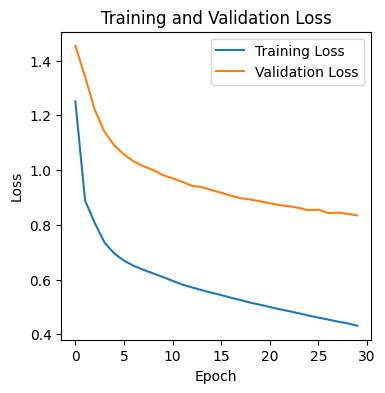

In [42]:
plt.figure(figsize=(4, 4))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()